# Treasury Auction Data Analysis

## Introduction

This notebook will walk through data analysis of US Treasury Bond Auction data found on the https://www.treasurydirect.gov website.

In order to obtain the data, a separate script Treasury *AuctionUtils.py* was created to handle the downloading of the auction results (xml files in the archives), and parsing through them to output a pandas DataFrame.

In this repo you will find this notebook, the additional .py file mentioned above, as well as a data directory containing bond auction result data from the 2022 calendar year.



# Getting Started

Start by importing the neccessary python packages:

In [1]:
import TreasuryAuctionUtils as TAU
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

Now, initialize the *TreasuryAuctionUtils AuctionDownload* object with a directory to save the xml data files to, a start date of the range of auction results to look at, the end date of the range of auction data to look at, and the specific security type you are interested in analyzing, and download the bond data for some year (this notebook will focus on 2022) using the *download* method:

In [ ]:
downloader = TAU.AuctionDownload('./Data', "2015-01-01", "2022-12-31", "Bond")
downloader.download()

After checking that the data has been downloaded to the download directory inputted into the *downloader* object, we can now start parsing through the auction results. The code will go through the xml files, parse out the data entries, and append the results as a row to a pandas DataFrame.

The first line initializes the *TreasuryAuctionUtils AuctionData* object with the path to where the xml files are saved, while the second line calls on the *auction_to_dataframe* method, and returns a DataFrame *df*:


In [2]:
parser = TAU.AuctionData(os.path.join(os.getcwd(),'Data'), "Bond")
df = parser.auction_to_dataframe()

In [3]:
df.head()

,AuctionDate,SecurityTermWeekYear,SecurityTermDayMonth,PrimaryDealerTendered,PrimaryDealerAccepted,DirectBidderTendered,DirectBidderAccepted,IndirectBidderTendered,IndirectBidderAccepted,CompetitiveTendered,...,TotalAccepted,BidToCoverRatio,ReleaseTime,AmountAcceptedBelowLowRate,HighAllocationPercentage,LowYield,HighYield,MedianYield,HighPrice,InterestRate
0,2022-01-13,29-YEAR,10-MONTH,29903000000,3948099500,6184400000,3756281500,15707850000,14293276500,51795250000,...,25529881900,2.35,13:02,5,71.09,1.940,2.075,2.000,95.566819,1.875
1,2022-01-19,19-YEAR,10-MONTH,27774000000,3350196500,5873000000,3404864500,15974300000,13243186200,49621300000,...,22989260500,2.48,13:02,5,82.43,2.120,2.210,2.150,96.646052,2.000
2,2022-02-10,30-YEAR,0-MONTH,30390000000,3287463000,6347900000,4082150000,16197495000,15627311400,52935395000,...,36914133100,2.30,13:02,5,98.94,2.150,2.340,2.249,98.067757,2.250
3,2022-02-16,20-YEAR,0-MONTH,25821000000,3060030000,6408000000,3985500000,14107550000,11947992000,46336550000,...,22255007600,2.44,13:01,5,72.06,2.280,2.396,2.330,99.667386,2.375
4,2022-02-17,30-YEAR,0-MONTH,11923000000,1820400000,1336000000,886000000,6286620000,6279620000,19545620000,...,10541851400,2.17,13:02,5,60.32,0.000,0.195,0.049,98.102682,0.125


The DataFrame contains all bond auction data, however, it may be beneficial to create DataFrames for the specific security terms. This is done below using conditional formatting:

In [19]:
df_20 = df[(df['SecurityTermWeekYear'] == '19-YEAR') | (df['SecurityTermWeekYear'] == '20-YEAR')].reset_index(drop=True)
df_30 = df[(df['SecurityTermWeekYear'] == '29-YEAR') | (df['SecurityTermWeekYear'] == '30-YEAR')].reset_index(drop=True)

# Data Exploration

Now that the DataFrames for the bond auctions have been created, we can now explore the data. Starting with the 20 year security term:

In [23]:
df_20.head(10)

,AuctionDate,SecurityTermWeekYear,SecurityTermDayMonth,PrimaryDealerTendered,PrimaryDealerAccepted,DirectBidderTendered,DirectBidderAccepted,IndirectBidderTendered,IndirectBidderAccepted,CompetitiveTendered,...,TotalAccepted,BidToCoverRatio,ReleaseTime,AmountAcceptedBelowLowRate,HighAllocationPercentage,LowYield,HighYield,MedianYield,HighPrice,InterestRate
0,2022-01-19,19-YEAR,10-MONTH,27774000000,3350196500,5873000000,3404864500,15974300000,13243186200,49621300000,...,22989260500,2.48,13:02,5,82.43,2.120,2.210,2.150,96.646052,2.000
1,2022-02-16,20-YEAR,0-MONTH,25821000000,3060030000,6408000000,3985500000,14107550000,11947992000,46336550000,...,22255007600,2.44,13:01,5,72.06,2.280,2.396,2.330,99.667386,2.375
2,2022-03-23,19-YEAR,11-MONTH,22908000000,1533000000,6762000000,4162596300,13901150000,10297950000,43571150000,...,18978623300,2.72,13:02,5,91.65,2.590,2.651,2.602,95.753797,2.375
3,2022-04-20,19-YEAR,10-MONTH,23553000000,1397998000,3819000000,2450372100,17435020000,12143347600,44807020000,...,18218454400,2.80,13:02,5,65.88,2.880,3.095,3.030,89.399717,2.375
4,2022-05-18,20-YEAR,0-MONTH,24549000000,2208632500,3978000000,2790775000,13881785000,11988998500,42408785000,...,19555763900,2.50,13:02,5,79.85,2.880,3.290,3.215,99.416025,3.250
5,2022-06-22,19-YEAR,11-MONTH,21409000000,1728000000,3426000000,2826000000,11501052000,9433507000,36336052000,...,15069995600,2.60,13:02,5,8.62,3.380,3.488,3.405,96.603091,3.250
6,2022-07-20,19-YEAR,10-MONTH,20900000000,1110241400,2697000000,1970000000,13539990000,10900420300,37136990000,...,15214669000,2.65,13:01,5,4.47,2.880,3.420,3.330,97.563393,3.250
7,2022-08-17,20-YEAR,0-MONTH,20320000000,2202984000,2743000000,2743000000,11485820000,10029820000,34548820000,...,16952881200,2.30,13:02,5,73.88,3.220,3.380,3.280,99.925621,3.375
8,2022-09-20,19-YEAR,11-MONTH,17804000000,966529000,2405000000,1992500000,11638630000,9030451000,31847630000,...,12000023100,2.65,13:02,5,65.82,3.700,3.820,3.750,93.835989,3.375
9,2022-10-19,19-YEAR,10-MONTH,18038000000,1966430000,2384000000,2376843000,9571020000,7622020000,29993020000,...,12000010800,2.50,13:02,5,28.43,4.220,4.395,4.319,86.599384,3.375


In [32]:
df_20['AuctionDate'] = pd.to_datetime(df_20['AuctionDate'])
df_20['BidToCoverRatio'] = np.float64(df_20['BidToCoverRatio'])
df_20.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AuctionDate                 24 non-null     datetime64[ns]
 1   SecurityTermWeekYear        24 non-null     object        
 2   SecurityTermDayMonth        24 non-null     object        
 3   PrimaryDealerTendered       24 non-null     object        
 4   PrimaryDealerAccepted       24 non-null     object        
 5   DirectBidderTendered        24 non-null     object        
 6   DirectBidderAccepted        24 non-null     object        
 7   IndirectBidderTendered      24 non-null     object        
 8   IndirectBidderAccepted      24 non-null     object        
 9   CompetitiveTendered         24 non-null     object        
 10  CompetitiveAccepted         24 non-null     object        
 11  NonCompetitiveAccepted      24 non-null     object        
 

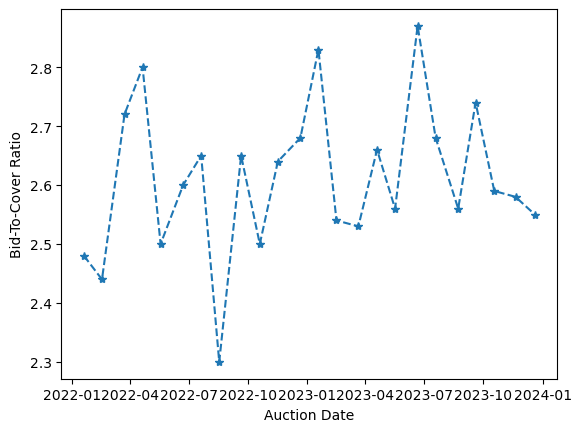

In [37]:
_ = plt.plot(df_20['AuctionDate'], df_20['BidToCoverRatio'], linestyle='dashed', marker='*')
_ = plt.xlabel('Auction Date')
_ = plt.ylabel('Bid-To-Cover Ratio')